# New Approach to Space Time Singularities by Susan Scott
##  Geoff Cope
##  Univeristy of Utah
##  December 25, 2021  Christmas Day AND the launch of JWST!!

Here we derive the field equations for metric 1.1

https://digital.library.adelaide.edu.au/dspace/bitstream/2440/19586/2/02whole.pdf

In [31]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [32]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [33]:
t,r,z,phi,dt,dr,dz,dphi = symbols('t r z phi dt dr dz dphi')

In [34]:
Lambda = Function('lambda')(r,z)
Lambda

In [35]:
nu = Function('nu')(r,z)
nu

In [36]:
variables = Matrix( [t,r,z,phi] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣φ⎦

In [37]:
differentials = Matrix( [dt,dr,dz,dphi] )
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎣dphi⎦

In [38]:
lineElement = expand(- exp(2*Lambda)*dt**2 + exp(2*(nu-Lambda))*(dr**2 + dz**2 ) + r**2 * exp(-2*Lambda) * dphi**2  )
lineElement

In [39]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅λ(r, z)                                                                ⎤
⎢-ℯ                     0                       0                   0       ⎥
⎢                                                                           ⎥
⎢              -2⋅λ(r, z)  2⋅ν(r, z)                                        ⎥
⎢     0       ℯ          ⋅ℯ                     0                   0       ⎥
⎢                                                                           ⎥
⎢                                      -2⋅λ(r, z)  2⋅ν(r, z)                ⎥
⎢     0                 0             ℯ          ⋅ℯ                 0       ⎥
⎢                                                                           ⎥
⎢                                                              2  -2⋅λ(r, z)⎥
⎣     0                 0                       0             r ⋅ℯ          ⎦

In [40]:
import sympy

In [41]:
m = sympy.Array(g)
m

⎡  2⋅λ(r, z)                                                                ⎤
⎢-ℯ                     0                       0                   0       ⎥
⎢                                                                           ⎥
⎢              -2⋅λ(r, z)  2⋅ν(r, z)                                        ⎥
⎢     0       ℯ          ⋅ℯ                     0                   0       ⎥
⎢                                                                           ⎥
⎢                                      -2⋅λ(r, z)  2⋅ν(r, z)                ⎥
⎢     0                 0             ℯ          ⋅ℯ                 0       ⎥
⎢                                                                           ⎥
⎢                                                              2  -2⋅λ(r, z)⎥
⎣     0                 0                       0             r ⋅ℯ          ⎦

In [42]:
from einsteinpy.symbolic import *

In [43]:
syms = sympy.symbols("t r z phi")
t,r,z,phi = syms

In [44]:
metric = MetricTensor(m,syms)

In [45]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                            ⎡ 4⋅λ(r, z) - 2⋅ν(r, z) ∂                                                     
⎢⎡             ∂            ∂             ⎤  ⎢ℯ                     ⋅──(λ(r, z))               0                           
⎢⎢     0       ──(λ(r, z))  ──(λ(r, z))  0⎥  ⎢                       ∂r                                                    
⎢⎢             ∂r           ∂z            ⎥  ⎢                                                                             
⎢⎢                                        ⎥  ⎢                                      ∂             ∂              ∂         
⎢⎢∂                                       ⎥  ⎢                0                   - ──(λ(r, z)) + ──(ν(r, z))  - ──(λ(r, z)
⎢⎢──(λ(r, z))       0            0       0⎥  ⎢                                      ∂r            ∂r             ∂z        
⎢⎢∂r                                      ⎥  ⎢                                                                             
⎢⎢      

In [46]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛    2                2                       ⎞                                                                           
⎢⎜   ∂                ∂             ∂          ⎟  4⋅λ(r, z) - 2⋅ν(r, z)                                                    
⎢⎜r⋅───(λ(r, z)) + r⋅───(λ(r, z)) + ──(λ(r, z))⎟⋅ℯ                                                                         
⎢⎜    2                2            ∂r         ⎟                                                                           
⎢⎝  ∂r               ∂z                        ⎠                                                                           
⎢──────────────────────────────────────────────────────────────────────                                                    
⎢                                  r                                                                                       
⎢                                                                                                                          
⎢       

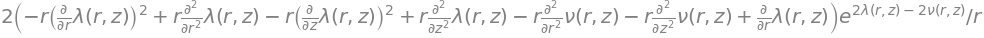

In [47]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [48]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛    2                2                       ⎞                              ⎛                 2       2                  
⎢⎜   ∂                ∂             ∂          ⎟  4⋅λ(r, z) - 2⋅ν(r, z)       ⎜    ⎛∂          ⎞       ∂               ⎛∂  
⎢⎜r⋅───(λ(r, z)) + r⋅───(λ(r, z)) + ──(λ(r, z))⎟⋅ℯ                        1.0⋅⎜- r⋅⎜──(λ(r, z))⎟  + r⋅───(λ(r, z)) - r⋅⎜──(
⎢⎜    2                2            ∂r         ⎟                              ⎜    ⎝∂r         ⎠        2              ⎝∂z 
⎢⎝  ∂r               ∂z                        ⎠                              ⎝                       ∂r                   
⎢────────────────────────────────────────────────────────────────────── + ─────────────────────────────────────────────────
⎢                                  r                                                                                       
⎢                                                                                                                          
⎢       

In [49]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢       

In [50]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢       

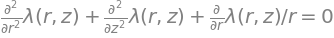

In [68]:
equation1pt2 = Eq(expand((1/r)*Ric.tensor()[0,0].args[1]),0)
equation1pt2

In [65]:
equation1pt3a = Eq(diff(nu,r),solve( simplify(einst.tensor()[1,1]) , diff(nu,r) )[0] )
equation1pt3a

In [55]:
equation1pt3b = Eq(diff(nu,z),solve( Ric.tensor()[2,1] , diff(nu,z))[0])
equation1pt3b

In [69]:
vacuumFieldEquations = Matrix([equation1pt2,equation1pt3a,equation1pt3b])
vacuumFieldEquations

⎡                                ∂                ⎤
⎢    2              2            ──(λ(r, z))      ⎥
⎢   ∂              ∂             ∂r               ⎥
⎢  ───(λ(r, z)) + ───(λ(r, z)) + ─────────── = 0  ⎥
⎢    2              2                 r           ⎥
⎢  ∂r             ∂z                              ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(ν(r, z)) = r⋅⎜⎜──(λ(r, z))⎟  - ⎜──(λ(r, z))⎟ ⎟⎥
⎢∂r              ⎝⎝∂r         ⎠    ⎝∂z         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(ν(r, z)) = 2⋅r⋅──(λ(r, z))⋅──(λ(r, z))    ⎥
⎣    ∂z                ∂r          ∂z             ⎦